In [1]:
import tensorflow.compat as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#conda install tensorflow

In [3]:
#conda install keras

In [4]:
import csv
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('yelp_reviews_chicago_labeled.csv')
df

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,mnr,rl,rd,Maximum Content Similarity
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,unlike next we d eaten previous night dish com...,N,Scott E.,"Glengary, WV",...,5.0,5.0,2.0,0.0,1.0,4.5,0.083333,497.0,0.125,0.123653
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,probably one best meals i ve ever it s perform...,N,Jerry K.,"Palos Verdes Peninsula, CA",...,0.0,0.0,0.0,0.0,0.0,4.5,0.083333,41.0,0.125,0.000000
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,service impeccable experience presentation coo...,N,Patricia M.,"Chicago, IL",...,0.0,1.0,0.0,0.0,0.0,4.5,0.083333,27.0,0.375,0.000000
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,the problem places like this given exhorbitant...,N,Terry N.,"San Jose, CA",...,8.0,6.0,6.0,11.0,0.0,4.5,0.083333,244.0,0.375,0.000000
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,i idea write review dining alinea brings whole...,N,Shradha Vegetarianista A.,"Chicago, IL",...,679.0,417.0,283.0,22.0,70.0,4.5,0.083333,97.0,0.125,0.760866
5,lKlceLWoePzeuvFD3sj4mw,HxXEcMDDTJFUqVfhPF9M8Q,pbEiXam9YJL3neCYHGwLUA,8/30/2012,5,3,despite first world tragedy i endured effort g...,N,Rachel L.,"San Jose, CA",...,20.0,37.0,12.0,0.0,4.0,4.5,0.083333,236.0,0.125,0.000000
6,PBS2uyee9V5IpFfTropxbw,OW2H-GkKnlVEBPuGHIaiFg,pbEiXam9YJL3neCYHGwLUA,9/8/2012,5,1,overall worth hype yes more was worth every pe...,N,Justin L.,"San Francisco, CA",...,17.0,12.0,1.0,0.0,1.0,4.5,0.083333,277.0,0.125,0.000000
7,PkwbB,BSh3h1J4mdSmEsb8FFdf0Q,pbEiXam9YJL3neCYHGwLUA,8/24/2012,3,8,there already tons professional amateur review...,N,Steven N.,"Chicago, IL",...,16.0,19.0,10.0,0.0,2.0,4.5,0.083333,260.0,0.375,0.163484
8,MRdliMXsmP1ViLjA5oCO,F3mbveXX30Ou0gpDY6IrCQ,pbEiXam9YJL3neCYHGwLUA,8/22/2012,5,3,your life countdown ever since born this life ...,N,Royal L.,"Chicago, IL",...,128.0,116.0,78.0,0.0,2.0,4.5,0.083333,327.0,0.125,0.269932
9,z-j4X,NvSnBp4fTpNOfDwm2GWusA,pbEiXam9YJL3neCYHGwLUA,8/23/2012,5,3,lots complaints difficult get i get it hard bu...,N,Calvin H.,"Plano, TX",...,5.0,6.0,6.0,5.0,0.0,4.5,0.083333,87.0,0.125,0.000000


In [6]:
df.reviewerID.unique()

array(['bNYesZ944s6IJVowOnB0iA', 'TRKxLC3y-ZvP45e5iilMtw',
       '0EMm8umAqXZzyhxNpL4M9g', ..., 'HNUdTQX_zRYj0eCNm-_ddw',
       'e_Ck7su37mxFB-TNSbIf-g', 'tFUWZZOgZMK9ZrpyppfOLg'], dtype=object)

In [7]:
df2 = df.drop(['reviewID', 'reviewContent', 'restaurantID', 'reviewerID', 'date', 'name', 'location', 'yelpJoinDate', 'mnr', 'rl', 'rd', 'Maximum Content Similarity'], axis = 1)

In [8]:
a = df.groupby('reviewerID')['reviewID'].nunique()

In [9]:
fields_with_nan_length = df2.isna().sum().where(lambda x : x > 0).dropna()
fields_with_nan_length

flagged             1.0
friendCount         1.0
reviewCount         1.0
firstCount          1.0
usefulCount         1.0
coolCount           1.0
funnyCount          1.0
complimentCount     1.0
tipCount            1.0
fanCount            1.0
restaurantRating    1.0
dtype: float64

In [10]:
df2 = df2.iloc[:-1, :]
df2

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating
0,5,0,N,11.0,48.0,5.0,41.0,5.0,5.0,2.0,0.0,1.0,4.5
1,5,0,N,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,3,2,N,2.0,11.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,4.5
3,3,8,N,84.0,60.0,1.0,35.0,8.0,6.0,6.0,11.0,0.0,4.5
4,5,1,N,333.0,1209.0,61.0,1650.0,679.0,417.0,283.0,22.0,70.0,4.5
5,5,3,N,59.0,54.0,1.0,68.0,20.0,37.0,12.0,0.0,4.0,4.5
6,5,1,N,45.0,77.0,0.0,60.0,17.0,12.0,1.0,0.0,1.0,4.5
7,3,8,N,34.0,116.0,2.0,93.0,16.0,19.0,10.0,0.0,2.0,4.5
8,5,3,N,33.0,209.0,11.0,248.0,128.0,116.0,78.0,0.0,2.0,4.5
9,5,3,N,2.0,21.0,1.0,19.0,5.0,6.0,6.0,5.0,0.0,4.5


In [11]:
authentic_reviews_df = df2[df2['flagged'] == 'N']
fake_reviews_df = df2[df2['flagged'] == 'Y']

In [12]:
authentic_reviews_df = authentic_reviews_df.sample(n = 500)

In [13]:
df2 = pd.concat([authentic_reviews_df , fake_reviews_df])

In [14]:
df2['flagged'] = [0 if x == 'N' else 1 for x in df2['flagged']]

In [15]:
flagged = df2['flagged']
df2 = df2.drop(['flagged'], axis=1)
df2 = pd.concat([df2,flagged], axis=1)
X = df2.iloc[:, :-1]
y = flagged
X.head()

,rating,reviewUsefulCount,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating
1722,5,0,2.0,71.0,10.0,43.0,17.0,23.0,5.0,117.0,0.0,4.0
910,5,0,54.0,178.0,3.0,168.0,85.0,61.0,27.0,13.0,4.0,4.0
2715,4,0,0.0,7.0,0.0,9.0,1.0,3.0,0.0,0.0,0.0,4.0
2317,5,0,37.0,180.0,9.0,247.0,132.0,110.0,45.0,3.0,5.0,4.0
2915,5,0,333.0,1209.0,61.0,1650.0,679.0,417.0,283.0,22.0,70.0,4.0


In [16]:
type(X)

pandas.core.frame.DataFrame

In [17]:
type(y)

pandas.core.series.Series

In [18]:
X = X.values

In [19]:
type(X)

numpy.ndarray

In [20]:
y = y.values.reshape(-1,1)

In [21]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

C:\Users\Euclid\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [24]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
876/876 [==============================] - 1s 635us/step - loss: 0.6994 - acc: 0.4349
Epoch 2/100
876/876 [==============================] - 0s 24us/step - loss: 0.6668 - acc: 0.5491
Epoch 3/100
876/876 [==============================] - 0s 30us/step - loss: 0.6420 - acc: 0.5753
Epoch 4/100
876/876 [==============================] - 0s 28us/step - loss: 0.6202 - acc: 0.6233
Epoch 5/100
876/876 [==============================] - 0s 22us/step - loss: 0.6008 - acc: 0.7055
Epoch 6/100
876/876 [==============================] - 0s 23us/step - loss: 0.5818 - acc: 0.7112
Epoch 7/100
876/876 [==============================] - 0s 22us/step - loss: 0.5624 - acc: 0.7295
Epoch 8/100
876/876 [==============================] - 0s 21us/step - loss: 0.5444 - acc: 0.7432
Epoch 9/100
876/876 [==============================] - 0s 23us/step - loss: 0.5289 - acc: 0.7546
Epoch 10/100
876/876 [=========

876/876 [==============================] - 0s 18us/step - loss: 0.2948 - acc: 0.8642
Epoch 79/100
876/876 [==============================] - 0s 18us/step - loss: 0.2944 - acc: 0.8653
Epoch 80/100
876/876 [==============================] - 0s 18us/step - loss: 0.2941 - acc: 0.8653
Epoch 81/100
876/876 [==============================] - 0s 17us/step - loss: 0.2945 - acc: 0.8642
Epoch 82/100
876/876 [==============================] - 0s 17us/step - loss: 0.2930 - acc: 0.8642
Epoch 83/100
876/876 [==============================] - 0s 49us/step - loss: 0.2920 - acc: 0.8653
Epoch 84/100
876/876 [==============================] - 0s 22us/step - loss: 0.2928 - acc: 0.8653
Epoch 85/100
876/876 [==============================] - 0s 19us/step - loss: 0.2922 - acc: 0.8653
Epoch 86/100
876/876 [==============================] - 0s 17us/step - loss: 0.2936 - acc: 0.8653
Epoch 87/100
876/876 [==============================] - 0s 17us/step - loss: 0.2942 - acc: 0.8653
Epoch 88/100
876/876 [===========

In [27]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

a = accuracy_score(test, pred)
print('Accuracy is:', a*100)
print(classification_report(test, pred))

Accuracy is: 90.81632653061224
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        44
           1       0.87      0.98      0.92        54

   micro avg       0.91      0.91      0.91        98
   macro avg       0.92      0.90      0.91        98
weighted avg       0.92      0.91      0.91        98



dict_keys(['loss', 'acc'])


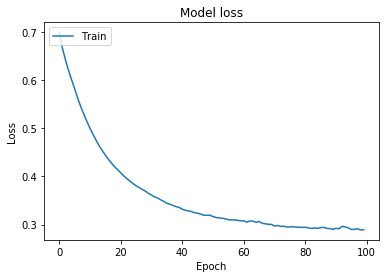

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(history.history['loss']) 
print(history.history.keys())
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()